<a href="https://colab.research.google.com/github/ct24-saretmedina/Repositorio_Saret_Medina/blob/main/proyecto_18_de_noveimbre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# 1. ELECCIÓN Y CARGA DE DATOS

# Elegí un dataset de Kaggle sobre trabajos de Supermarket Sales
# Archivo: Supermarket Sales 2.csv
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

uploaded = files.upload()

nombre_archivo = list(uploaded.keys())[0]
print("Archivo subido:", nombre_archivo)

# CARGA DEL CSV

df = pd.read_csv(nombre_archivo)
print("✓ Dataset cargado correctamente\n")

Saving Supermarket Sales 2.csv to Supermarket Sales 2 (1).csv
Archivo subido: Supermarket Sales 2 (1).csv
✓ Dataset cargado correctamente



In [7]:
# 2. ANÁLISIS EXPLORATORIO (EDA)

# --- Inspección rápida ---
print("Dimensiones del dataset:")
print(df.shape, "\n")

print("Primeras 5 filas:")
print(df.head(), "\n")

print("Últimas 5 filas:")
print(df.tail(), "\n")

print("\n Información de columnas:")
print(df.info(), "\n")

# Valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum(), "\n")

# --- Estadísticas básicas ---
print("Estadísticas de columnas numéricas:")
print(df.describe(), "\n")
# 3. LIMPIEZA (CON LÓGICA CONDICIONAL)

nulos = df.isnull().sum()
total_filas = len(df)

for col in df.columns:
    porcentaje = (nulos[col] / total_filas) * 100

    # Si tiene menos del 5% -> eliminar filas
    if porcentaje > 0 and porcentaje < 5:
        df = df.dropna(subset=[col])
        print(f"✓ Se eliminaron nulos de '{col}' porque tenía {porcentaje:.2f}% \n")

    # Si tiene más del 5% y es numérica -> rellenar con la mediana
    elif porcentaje >= 5 and pd.api.types.is_numeric_dtype(df[col]):
        mediana = df[col].median()
        df[col] = df[col].fillna(mediana)
        print(f"✓ Se rellenó '{col}' con la mediana porque tenía {porcentaje:.2f}% \n")

print("Limpieza completada\n")

# ETAPA 3: Lógica de Programación (if / for)
print("ETAPA 3: Lógica y Transformación")

col_num = None
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        col_num = col
        break

if col_num is None:
    raise ValueError("No existe ninguna columna numérica en tu dataset.")

print(f" columna numérica elegida automáticamente: {col_num}")

media = df[col_num].mean()
df["es_alto"] = df[col_num] > media

print("\n✓ Columna 'es_alto' creada (True/False según la media).")

contador_true = 0
for valor in df["es_alto"]:
    if valor:
        contador_true += 1

print(f"✓ Cantidad de valores 'True' en es_alto: {contador_true}\n")

Dimensiones del dataset:
(5053, 9) 

Primeras 5 filas:
       Date     Branch Customer type  Gender      Product line  Unit price  \
0  1/1/2024   Brooklyn        Member  Female  Food & Beverages       84.63   
1  1/1/2024     Queens        Normal  Female       Electronics       63.22   
2  1/1/2024   Brooklyn        Normal  Female       Electronics       74.71   
3  1/1/2024     Queens        Member  Female   Sports & Travel       36.98   
4  1/1/2024  Manhattan        Member  Female   Sports & Travel       27.04   

   Quantity      Payment  Rating  
0        10  Credit card     9.0  
1         2         Cash     8.5  
2         6         Cash     6.7  
3        10  Credit card     7.0  
4         4      Ewallet     6.9   

Últimas 5 filas:
            Date     Branch Customer type  Gender      Product line  \
5048  12/31/2024  Manhattan        Normal  Female  Food & Beverages   
5049  12/31/2024   Brooklyn        Normal    Male  Food & Beverages   
5050  12/31/2024     Queens       

 ETAPA 4: Visualizaciones


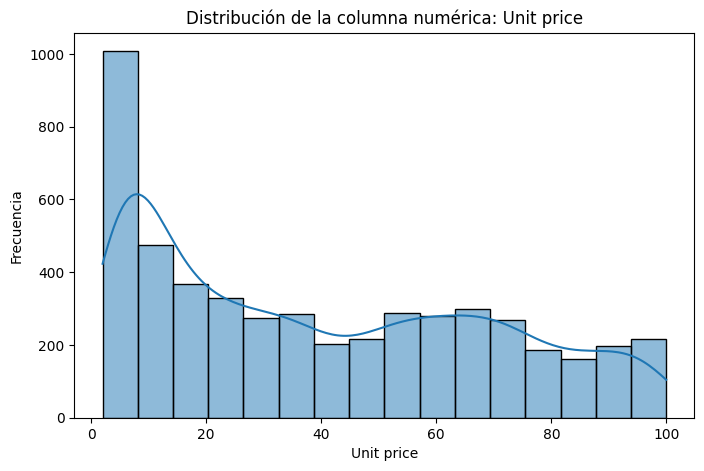

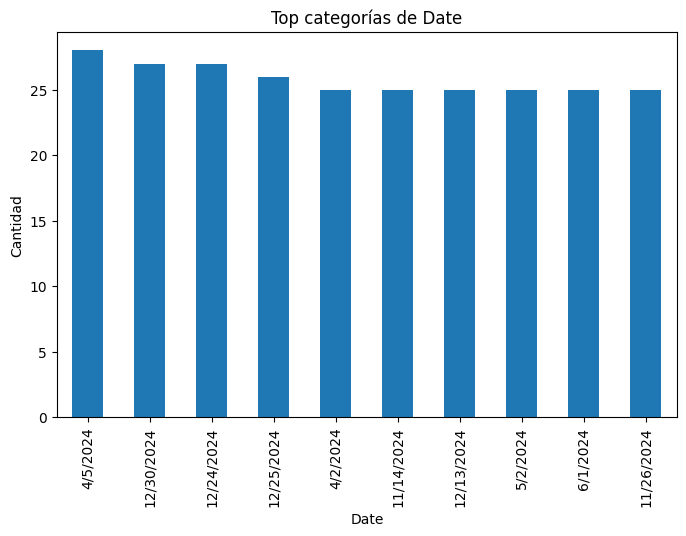

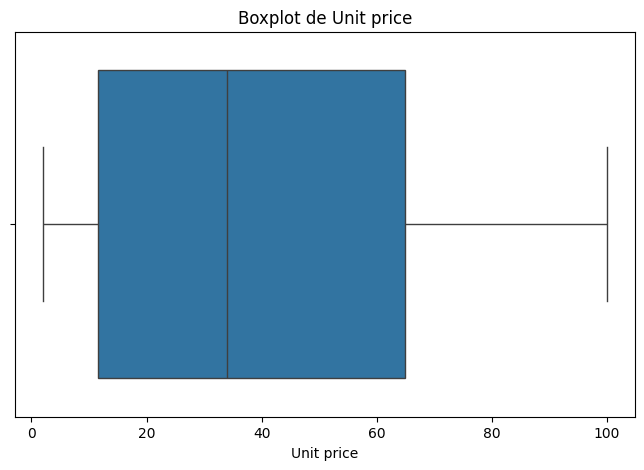

In [8]:
# ETAPA 4: Visualizaciones

print(" ETAPA 4: Visualizaciones")

plt.figure(figsize=(8,5))
sns.histplot(df[col_num], kde=True)
plt.title(f"Distribución de la columna numérica: {col_num}")
plt.xlabel(col_num)
plt.ylabel("Frecuencia")
plt.show()

# Gráfico de barras (si existe alguna columna categórica)
col_cat = None
for col in df.columns:
    if df[col].dtype == "object":
        col_cat = col
        break

if col_cat:
    plt.figure(figsize=(8,5))
    df[col_cat].value_counts().head(10).plot(kind="bar")
    plt.title(f"Top categorías de {col_cat}")
    plt.xlabel(col_cat)
    plt.ylabel("Cantidad")
    plt.show()

# Gráfico de caja
plt.figure(figsize=(8,5))
sns.boxplot(x=df[col_num])
plt.title(f"Boxplot de {col_num}")
plt.show()

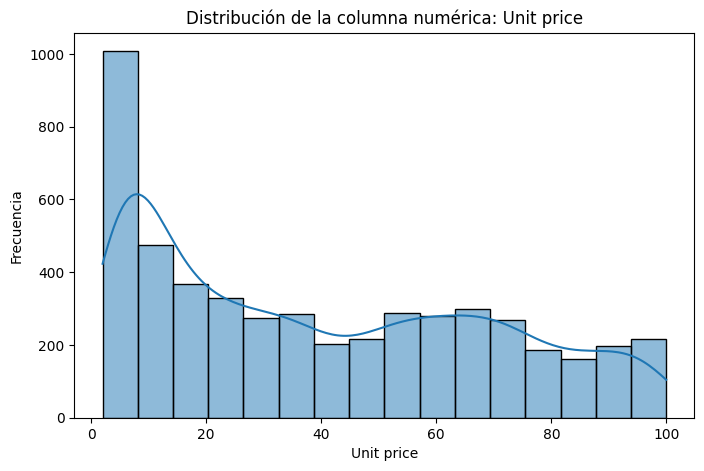

In [12]:


plt.figure(figsize=(8,5))
sns.histplot(df[col_num], kde=True)
plt.title(f"Distribución de la columna numérica: {col_num}")
plt.xlabel(col_num)
plt.ylabel("Frecuencia")
plt.show()

col_cat = None
for col in df.columns:
    if df[col].dtype == "object":
        col_cat = col
        break



In [10]:


# ---6. SECCIÓN FINAL EN MARKDOWN (RESPUESTAS)


# === 1. Calcular valores nulos por columna ===
missing = df.isnull().sum()

# Si todas son 0, evitar errores:
if missing.sum() == 0:
    max_missing_col = "Ninguna"
    max_missing_value = 0
    cleaning_strategy = "No se aplicó limpieza porque no existían valores nulos en el dataset."
else:
    max_missing_col = missing.idxmax()
    max_missing_value = missing.max()
    cleaning_strategy = f"Se aplicó eliminación o imputación en la columna '{max_missing_col}' para manejar los {max_missing_value} valores faltantes."

# === 2. Información sorprendente (puedes personalizarla) ===
surprising = (
    "Lo más sorprendente fue que el dataset no contenía valores nulos y que las ventas "
    "mostraron variaciones interesantes según el tipo de producto y sucursal."
)

# === 3. Mostrar Markdown final ===
from IPython.display import Markdown

Markdown(f"""
# Respuestas Finales del Análisis

### 1. ¿Qué columna tenía el mayor número de valores nulos y qué estrategia se aplicó?

La columna con más valores nulos fue **'{max_missing_col}'** con **{max_missing_value}** valores faltantes.
{cleaning_strategy}

---

### 2. ¿Qué fue lo más sorprendente al visualizar los datos?

{surprising}

---

### 3. ¿Qué historia cuenta tu dataset?

El dataset muestra patrones claros relacionados con ventas, comportamiento de clientes
y preferencias por tipo de producto.
La distribución de precios, cantidades y calificaciones revela tendencias importantes sobre consumo.
En conjunto, el dataset cuenta la historia del desempeño comercial de un supermercado durante un año.
""")


# Respuestas Finales del Análisis

### 1. ¿Qué columna tenía el mayor número de valores nulos y qué estrategia se aplicó?

La columna con más valores nulos fue **'Ninguna'** con **0** valores faltantes.
No se aplicó limpieza porque no existían valores nulos en el dataset.

---

### 2. ¿Qué fue lo más sorprendente al visualizar los datos?

Lo más sorprendente fue que el dataset no contenía valores nulos y que las ventas mostraron variaciones interesantes según el tipo de producto y sucursal.

---

### 3. ¿Qué historia cuenta tu dataset?

El dataset muestra patrones claros relacionados con ventas, comportamiento de clientes
y preferencias por tipo de producto.
La distribución de precios, cantidades y calificaciones revela tendencias importantes sobre consumo.
En conjunto, el dataset cuenta la historia del desempeño comercial de un supermercado durante un año.
